In [442]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [443]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [444]:
df1=pd.read_csv('/content/gdrive/MyDrive/bill_amount.csv')
df2=pd.read_csv('/content/gdrive/MyDrive/bill_id.csv')
df3=pd.read_csv('/content/gdrive/MyDrive/clinical_data.csv')
df4=pd.read_csv('/content/gdrive/MyDrive/demographics.csv')

In [445]:
df5 = [df1, df2, df3, df4]

In [446]:
df = pd.concat(df5)

In [447]:
df

,bill_id,amount,patient_id,date_of_admission,id,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,gender,race,resident_status,date_of_birth
0,4.031510e+07,1552.634830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.660045e+09,1032.011951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.148335e+09,6469.605351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.818426e+09,755.965425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9.833542e+09,897.347816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,NaN,NaN,0ba769860b060834b8c728ad26137c7f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,Malay,PR,1948-01-02
2996,NaN,NaN,a27a55b92a7afd9cfc427085a2734385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,Malay,Singaporean,1942-03-08
2997,NaN,NaN,c17a0f4c4f3931bed36081fabf501396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,Indian,Singaporean,1964-01-02
2998,NaN,NaN,c5ca8e8bfd744a1ef6f77318bcb591b4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,Chinese,Singaporean,1973-04-19


In [448]:
df.describe(include='all')

,bill_id,amount,patient_id,date_of_admission,id,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,gender,race,resident_status,date_of_birth
count,2.720000e+04,13600.000000,16600,17000,3400,3400,3400.000000,3167.000000,3400,3400.000000,3096.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3000,3000,3000,3000
unique,NaN,NaN,3000,1450,3000,1532,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,6,4,2746
top,NaN,NaN,4e46fddfa404b306809c350aecbf0f6a,2014-05-24,4e46fddfa404b306809c350aecbf0f6a,2011-10-23,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,Chinese,Singaporean,1975-08-20
freq,NaN,NaN,17,45,4,9,NaN,NaN,2176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1396,1608,1782,4
mean,5.007147e+09,5464.767783,NaN,NaN,NaN,NaN,0.169118,0.311336,NaN,0.052059,0.063953,0.254706,0.254412,0.503824,0.591176,0.820882,0.523235,0.819706,0.744118,0.619706,0.662353,0.544706,0.726471,0.526765,14.469882,27.431529,99.489706,78.748441,165.084412,NaN,NaN,NaN,NaN
std,2.885866e+09,7717.479509,NaN,NaN,NaN,NaN,0.374911,0.463113,NaN,0.222178,0.244710,0.435760,0.435594,0.500059,0.491689,0.383507,0.499533,0.384489,0.436420,0.485530,0.472977,0.498071,0.445836,0.499357,1.747323,2.463844,15.254453,10.975076,6.973678,NaN,NaN,NaN,NaN
min,5.584120e+05,79.496707,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.100000,19.700000,52.000000,48.000000,151.000000,NaN,NaN,NaN,NaN
25%,2.485853e+09,950.689008,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.200000,25.800000,88.000000,71.200000,160.000000,NaN,NaN,NaN,NaN
50%,4.992958e+09,1516.951136,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.500000,27.400000,100.000000,78.900000,165.000000,NaN,NaN,NaN,NaN
75%,7.524563e+09,7307.056573,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.800000,29.100000,110.000000,86.300000,170.000000,NaN,NaN,NaN,NaN


In [449]:
col = list(df.columns)
col

['bill_id',
 'amount',
 'patient_id',
 'date_of_admission',
 'id',
 'date_of_discharge',
 'medical_history_1',
 'medical_history_2',
 'medical_history_3',
 'medical_history_4',
 'medical_history_5',
 'medical_history_6',
 'medical_history_7',
 'preop_medication_1',
 'preop_medication_2',
 'preop_medication_3',
 'preop_medication_4',
 'preop_medication_5',
 'preop_medication_6',
 'symptom_1',
 'symptom_2',
 'symptom_3',
 'symptom_4',
 'symptom_5',
 'lab_result_1',
 'lab_result_2',
 'lab_result_3',
 'weight',
 'height',
 'gender',
 'race',
 'resident_status',
 'date_of_birth']

In [450]:
df.columns = col
df.columns

Index(['bill_id', 'amount', 'patient_id', 'date_of_admission', 'id',
       'date_of_discharge', 'medical_history_1', 'medical_history_2',
       'medical_history_3', 'medical_history_4', 'medical_history_5',
       'medical_history_6', 'medical_history_7', 'preop_medication_1',
       'preop_medication_2', 'preop_medication_3', 'preop_medication_4',
       'preop_medication_5', 'preop_medication_6', 'symptom_1', 'symptom_2',
       'symptom_3', 'symptom_4', 'symptom_5', 'lab_result_1', 'lab_result_2',
       'lab_result_3', 'weight', 'height', 'gender', 'race', 'resident_status',
       'date_of_birth'],
      dtype='object')

In [451]:
# Find Binary Feature | Variables : Features with only two Values (Labels | Classes) :
binary_features = []

for col in df.columns :
    if df[col].value_counts().shape[0] == 2 :
        binary_features.append(col)

print(f'Binary Feature: {binary_features}')

Binary Feature: ['medical_history_1', 'medical_history_2', 'medical_history_4', 'medical_history_5', 'medical_history_6', 'medical_history_7', 'preop_medication_1', 'preop_medication_2', 'preop_medication_3', 'preop_medication_4', 'preop_medication_5', 'preop_medication_6', 'symptom_1', 'symptom_2', 'symptom_3', 'symptom_4', 'symptom_5']


###Binary Categorical Features

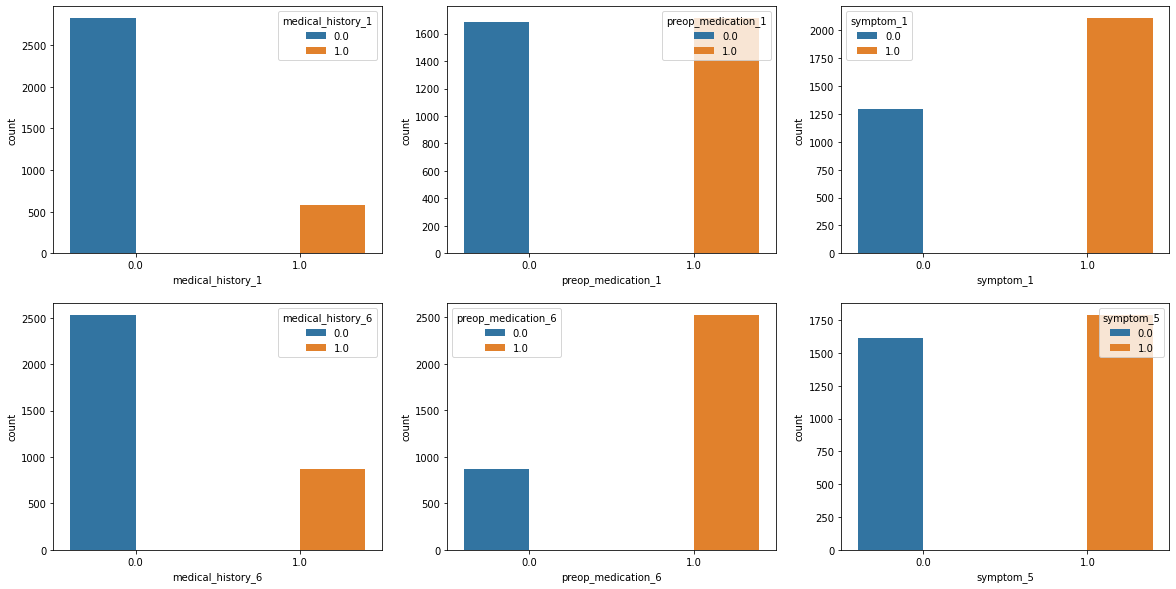

In [452]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20,10))

sns.countplot(x = 'medical_history_1', data = df, hue = 'medical_history_1', ax = axes[0,0])
sns.countplot(x = 'preop_medication_1', data = df, hue = 'preop_medication_1', ax = axes[0,1])
sns.countplot(x = 'symptom_1', data = df, hue = 'symptom_1', ax = axes[0,2])
sns.countplot(x = 'medical_history_6', data = df, hue = 'medical_history_6', ax = axes[1,0])
sns.countplot(x = 'preop_medication_6', data = df, hue = 'preop_medication_6', ax = axes[1,1])
sns.countplot(x = 'symptom_5', data = df, hue = 'symptom_5', ax = axes[1,2]);

###Remaining Categorical Data

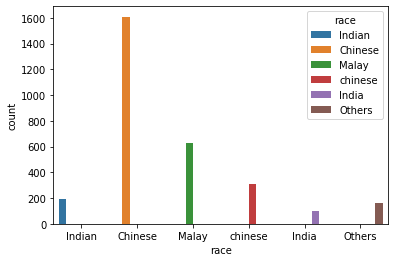

In [453]:
sns.countplot(x = 'race', data = df, hue='race');

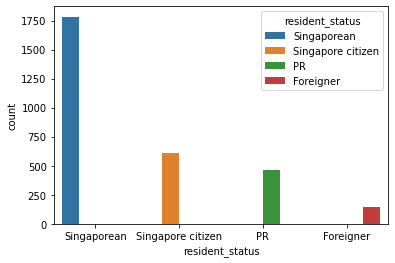

In [454]:
sns.countplot(x = 'resident_status', data = df, hue = 'resident_status');

###Continuous Variables

In [455]:
list(df.select_dtypes('number').columns)

['bill_id',
 'amount',
 'medical_history_1',
 'medical_history_2',
 'medical_history_4',
 'medical_history_5',
 'medical_history_6',
 'medical_history_7',
 'preop_medication_1',
 'preop_medication_2',
 'preop_medication_3',
 'preop_medication_4',
 'preop_medication_5',
 'preop_medication_6',
 'symptom_1',
 'symptom_2',
 'symptom_3',
 'symptom_4',
 'symptom_5',
 'lab_result_1',
 'lab_result_2',
 'lab_result_3',
 'weight',
 'height']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


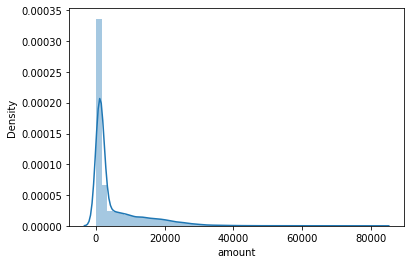

In [456]:
sns.distplot(df['amount']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


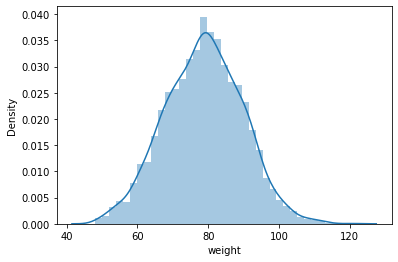

In [457]:
sns.distplot(df['weight']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


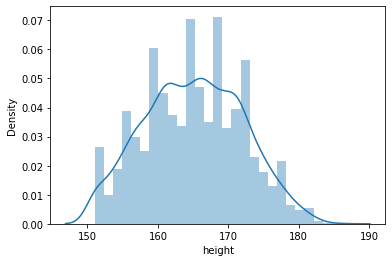

In [458]:
sns.distplot(df['height']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


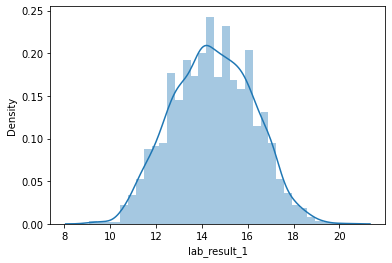

In [459]:
sns.distplot(df['lab_result_1']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


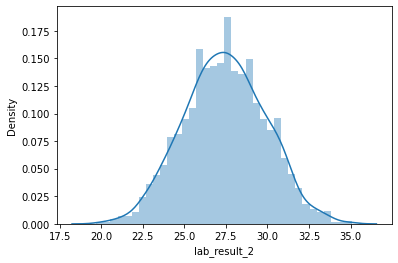

In [460]:
sns.distplot(df['lab_result_2']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


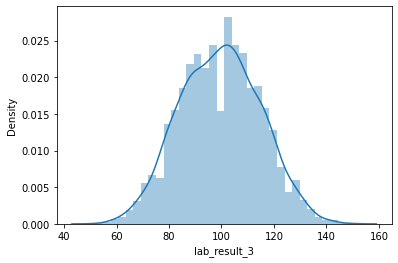

In [461]:
sns.distplot(df['lab_result_3']);

In [462]:
df['bill_id'].fillna(int(df['bill_id'].mean()), inplace=True)
df['amount'].fillna(int(df['amount'].mean()), inplace=True)
df['medical_history_1'].fillna(int(df['medical_history_1'].mean()), inplace=True)
df['preop_medication_1'].fillna(int(df['preop_medication_1'].mean()), inplace=True)
df['lab_result_3'].fillna(int(df['lab_result_3'].mean()), inplace=True)
df['lab_result_1'].fillna(int(df['lab_result_1'].mean()), inplace=True)
df['lab_result_2'].fillna(int(df['lab_result_2'].mean()), inplace=True)

###Sweetviz
Beautiful and High Density Visualizations for Exploratory Data Analysis

import sweetviz as sv

eda = sv.analyze([df, "data"],target_feat='medical_history_1')

eda.show_html('Report.html')

In [464]:
data = df.drop(['medical_history_2','medical_history_4','medical_history_5','medical_history_6','date_of_birth','gender','race','resident_status','date_of_discharge','medical_history_3','medical_history_7','preop_medication_2','preop_medication_3','preop_medication_4','preop_medication_5','preop_medication_6','symptom_1','symptom_2','symptom_3','symptom_4','symptom_5','weight','height','patient_id', 'date_of_admission', 'id'],axis = 1)

In [466]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data['bill_id'] = scaler.fit_transform(data[['bill_id']])

data['amount'] = scaler.fit_transform(data[['amount']])

X = data


In [467]:
X.dtypes

bill_id               float64
amount                float64
medical_history_1     float64
preop_medication_1    float64
lab_result_1          float64
lab_result_2          float64
lab_result_3          float64
dtype: object

In [468]:
X.isnull().sum()


bill_id               0
amount                0
medical_history_1     0
preop_medication_1    0
lab_result_1          0
lab_result_2          0
lab_result_3          0
dtype: int64

In [469]:
X.astype(int)

,bill_id,amount,medical_history_1,preop_medication_1,lab_result_1,lab_result_2,lab_result_3
0,0,0,0,0,14,27,99
1,0,0,0,0,14,27,99
2,0,0,0,0,14,27,99
3,0,0,0,0,14,27,99
4,0,0,0,0,14,27,99
...,...,...,...,...,...,...,...
2995,0,0,0,0,14,27,99
2996,0,0,0,0,14,27,99
2997,0,0,0,0,14,27,99
2998,0,0,0,0,14,27,99


In [470]:
X['medical_history_1'].value_counts()

0.0    33025
1.0      575
Name: medical_history_1, dtype: int64

In [471]:
x = X.drop('medical_history_1', axis = 1)
y = X['medical_history_1']

# Train Test Split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [472]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [473]:
ridge_classifier = RidgeClassifier().fit(x_train, y_train)

In [474]:
y_prediction = ridge_classifier.predict(x_train)

print(f'Accuracy of Ridge Classifier on Train Set : {accuracy_score(y_train, y_prediction)*100:.2f}%')

Accuracy of Ridge Classifier on Train Set : 98.33%


Model Evaluation 

In [480]:
y_prediction = ridge_classifier.predict(x_test)

print(f'Accuracy of Ridge Classifier on Test Set : {accuracy_score(y_test, y_prediction)*100:.2f}%')

Accuracy of Ridge Classifier on Test Set : 98.12%


 by trying Different Model

Random Forest Classifier

In [475]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100, max_depth = 10).fit(x_train, y_train)

y_prediction = rfc.predict(x_train)

print(f'Accuracy of Random Forest Classifier on Train Set : {accuracy_score(y_train, y_prediction)*100:.2f}%')

y_prediction = rfc.predict(x_test)

print(f'Accuracy of Random Forest Classifier on Test Set : {accuracy_score(y_test, y_prediction)*100:.2f}%')

Accuracy of Random Forest Classifier on Train Set : 98.49%
Accuracy of Random Forest Classifier on Test Set : 98.07%


Accuracy on Training Set is  more that Represents Overfitting.

We can Decrease the Depth of the Tree to Prevent Model from Overfitting, 

We Must Carefully Optimize the Parameters, Parameter Tuning is Very Critical Part.

We can Increase the Number of Trees which will Help the Model to be more Generalized and Reduce Overfitting.

Another way is to do Cross Validation which Allows to Use Every Sample in Train Set and Test Set.

##Grid Search Cross Validation


In [476]:
from sklearn.model_selection import GridSearchCV

parameters  = {'n_estimators' : [150, 200, 250, 300], 'max_depth' : [15, 20, 25]}

gsv_rfc = GridSearchCV(estimator = rfc, param_grid = parameters, n_jobs = -1, cv = 5).fit(x_train,y_train)

In [477]:
# Best Parameters :

gsv_rfc.best_params_

{'max_depth': 15, 'n_estimators': 150}

In [478]:
# Best Score :

print(f'Best Accuracy Score obtained from Grid Search Cross Validation : {gsv_rfc.best_score_*100:.2f}%')

Best Accuracy Score obtained from Grid Search Cross Validation : 98.26%


In [479]:
gsv_rfc = GridSearchCV(estimator = rfc, param_grid = parameters, n_jobs = -1, cv = 5).fit(x,y)

print(f'Best Accuracy Score obtained from Grid Search Cross Validation : {gsv_rfc.best_score_*100:.2f}%')

Best Accuracy Score obtained from Grid Search Cross Validation : 90.24%


###Linear Regression

In [482]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [483]:
predictions=lm.predict(x_test)

In [484]:
seed = 10
test_size = 0.25
trainingSet, testingSet = train_test_split(X, test_size = test_size, random_state = seed)

In [485]:
trainingSet.shape , testingSet.shape , X.shape

((25200, 7), (8400, 7), (33600, 7))

In [486]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=10, random_state=None)
model = LinearRegression()

In [487]:
import statsmodels.formula.api as smf

In [488]:
model_1 = smf.ols(formula = """medical_history_1 ~ bill_id+amount	+preop_medication_1
                            +lab_result_1+lab_result_2+lab_result_3 """, data = trainingSet)
result_1 = model_1.fit()
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:      medical_history_1   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     343.6
Date:                Mon, 17 May 2021   Prob (F-statistic):               0.00
Time:                        17:00:28   Log-Likelihood:                 16946.
No. Observations:               25200   AIC:                        -3.388e+04
Df Residuals:                   25193   BIC:                        -3.382e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.2842      0

In [490]:
#Calculating trainingset MSE/RMSE for model_1
y_hat2 = result_1.predict(trainingSet[['bill_id','amount','preop_medication_1',
                                             'lab_result_1','lab_result_2','lab_result_3']])
train_MSE = np.mean(((trainingSet.medical_history_1 - y_hat2)**2))
print("Training RMSE = ", np.sqrt(train_MSE))

Training RMSE =  0.12351292452128776


In [491]:
print("MSE = ", mean_squared_error(trainingSet.medical_history_1, y_hat2))
print("Training RMSE = ", np.sqrt(mean_squared_error(trainingSet.medical_history_1, y_hat2)))
print(result_1.mse_resid)  # MSE of residues
print("R_squared = ",result_1.rsquared)   # R_squared value
print("Adjusted R_squared = ",result_1.rsquared_adj)  # Adjusted R_Squared

MSE =  0.015255442523801928
Training RMSE =  0.12351292452129019
0.015259681324169747
R_squared =  0.07564923845857108
Adjusted R_squared =  0.07542909379262219


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6e77d5a210>,
      dtype=object)

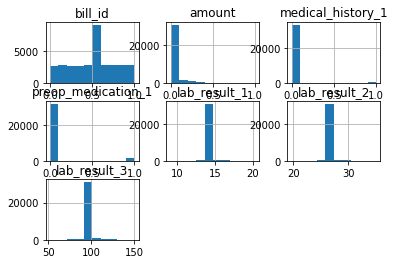

In [492]:
X.hist()